In [ ]:
import pandas as pd

df = pd.read_csv("student-scores.csv")

print(df.head())

   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [ ]:
print("Column Names:")
print(df.info())

Column Names:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 n

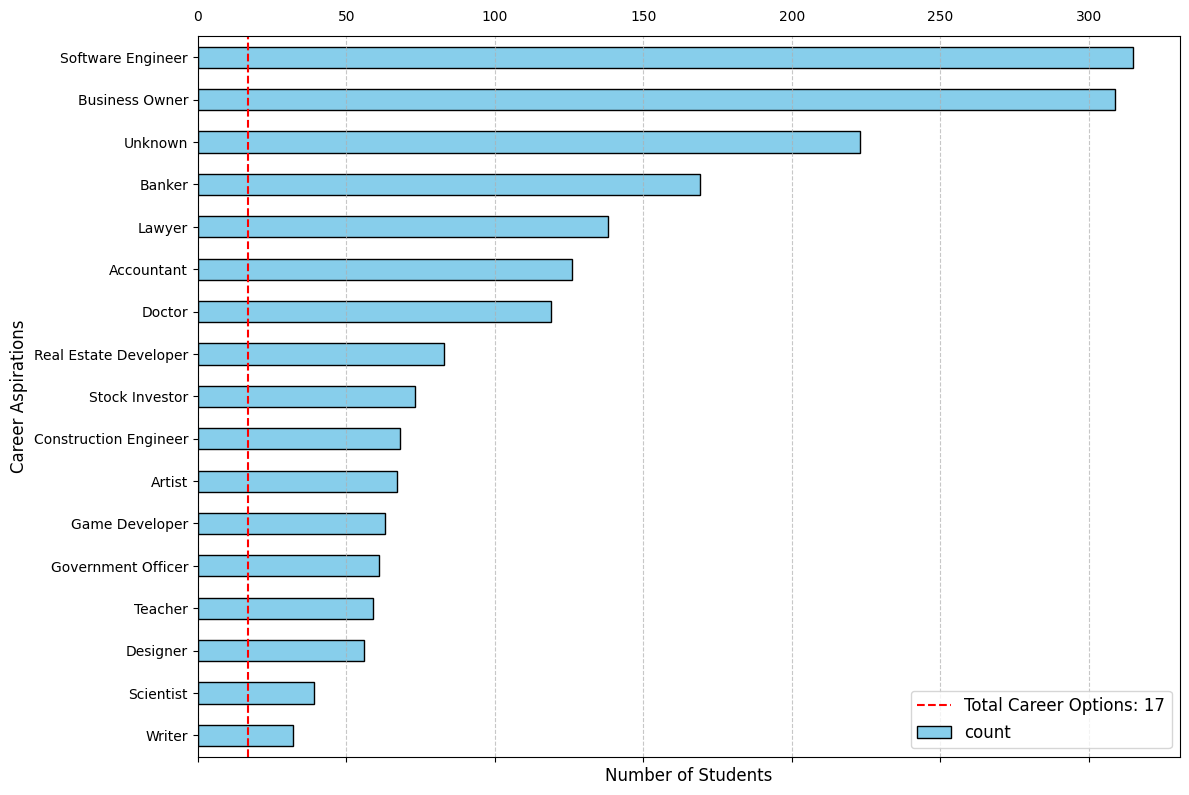

In [ ]:
import matplotlib.pyplot as plt

# --- Breakdown of Career Aspirations ---
plt.figure(figsize=(12, 8))
# Sort career aspirations in descending order
career_counts = df['career_aspiration'].value_counts().sort_values(ascending=True)

# Plot horizontal bar chart
career_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.axvline(len(career_counts), color='red', linestyle='--', label=f'Total Career Options: {len(career_counts)}')

# Add titles and labels
#plt.title('Breakdown of Career Aspirations', fontsize=16)
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Career Aspirations', fontsize=12)
plt.xticks(fontsize=10, position=(0, 1.05))
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


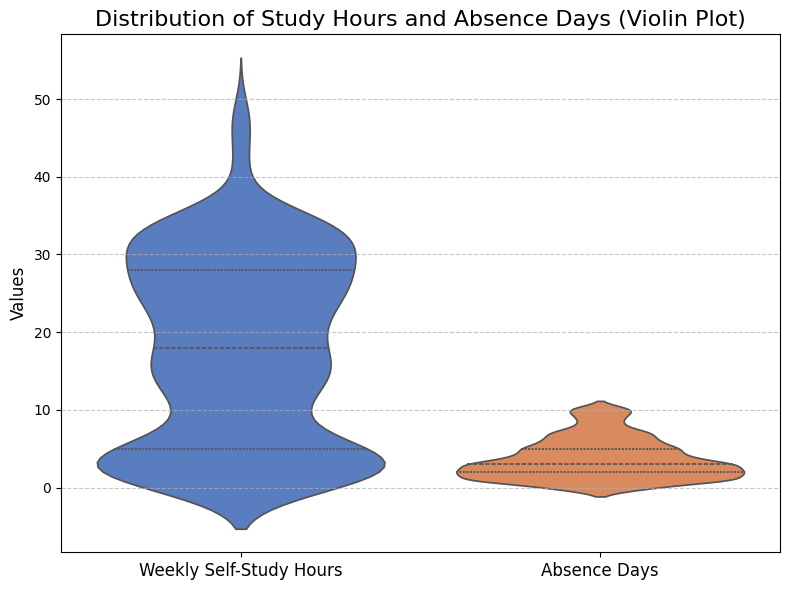

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=[df['weekly_self_study_hours'], df['absence_days']], palette="muted", inner="quartile")

# Add labels and title
plt.xticks([0, 1], ['Weekly Self-Study Hours', 'Absence Days'], fontsize=12)
plt.title('Distribution of Study Hours and Absence Days (Violin Plot)', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


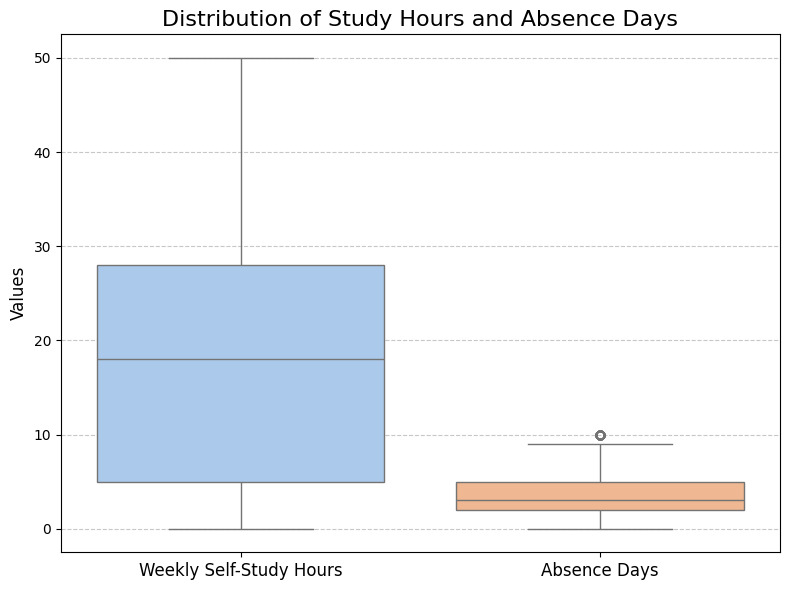

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
data_to_plot = [df['weekly_self_study_hours'], df['absence_days']]

# Create side-by-side boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_to_plot, palette="pastel")

# Add custom labels
plt.xticks([0, 1], ['Weekly Self-Study Hours', 'Absence Days'], fontsize=12)
plt.title('Distribution of Study Hours and Absence Days', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


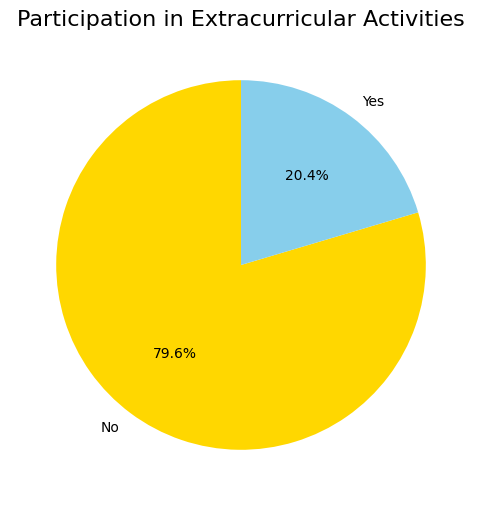

In [ ]:
# --- 4. Participation in Extracurricular Activities ---
plt.figure(figsize=(8, 6))
extra_counts = df['extracurricular_activities'].value_counts()
extra_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'skyblue'], labels=['No', 'Yes'], startangle=90)
plt.title('Participation in Extracurricular Activities', fontsize=16)
plt.ylabel('')  # Remove the y-label for a clean look
plt.show()

In [ ]:

# --- 5. Summary of Weekly Self-Study Hours and Absence Days ---
print("Summary of Weekly Self-Study Hours:")
print(df['weekly_self_study_hours'].describe())

print("\nSummary of Absence Days:")
print(df['absence_days'].describe())


Summary of Weekly Self-Study Hours:
count    2000.000000
mean       17.755500
std        12.129604
min         0.000000
25%         5.000000
50%        18.000000
75%        28.000000
max        50.000000
Name: weekly_self_study_hours, dtype: float64

Summary of Absence Days:
count    2000.000000
mean        3.665500
std         2.629271
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: absence_days, dtype: float64


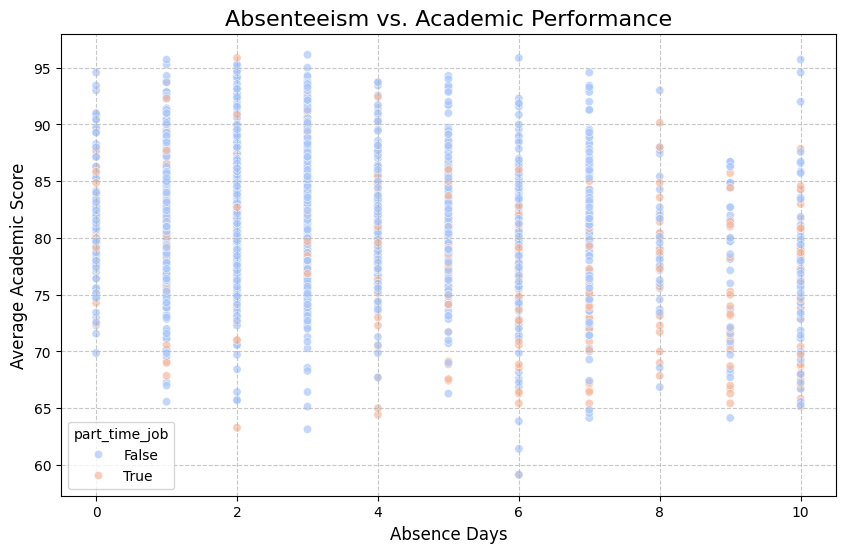

<ipython-input-26-f9a4b12bd359>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='part_time_job', y=df[['math_score', 'history_score', 'physics_score']].mean(axis=1), palette='Set3')


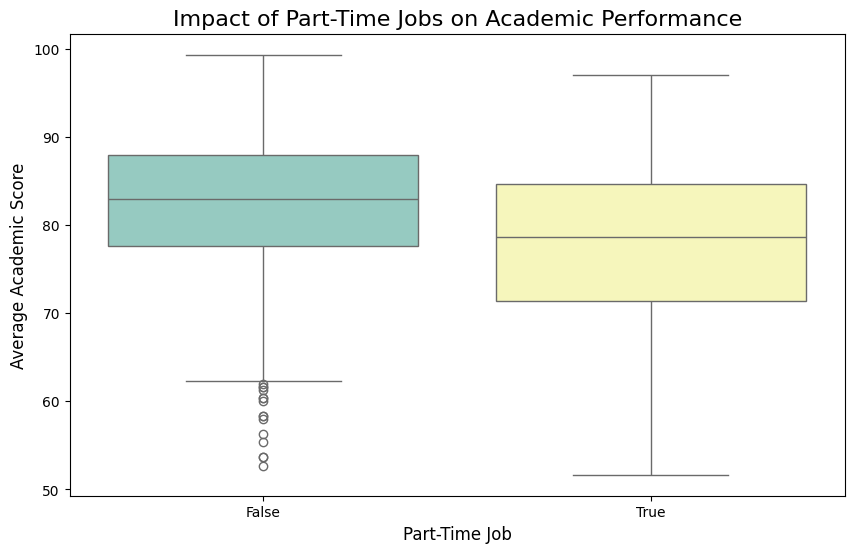

In [ ]:
# Correlation Between Absenteeism and Academic Performance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='absence_days', y=df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score','geography_score']].mean(axis=1),
                hue='part_time_job', palette='coolwarm', alpha=0.7)
plt.title('Absenteeism vs. Academic Performance', fontsize=16)
plt.xlabel('Absence Days', fontsize=12)
plt.ylabel('Average Academic Score', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Scores vs. Part-Time Job
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='part_time_job', y=df[['math_score', 'history_score', 'physics_score']].mean(axis=1), palette='Set3')
plt.title('Impact of Part-Time Jobs on Academic Performance', fontsize=16)
plt.xlabel('Part-Time Job', fontsize=12)
plt.ylabel('Average Academic Score', fontsize=12)
plt.show()


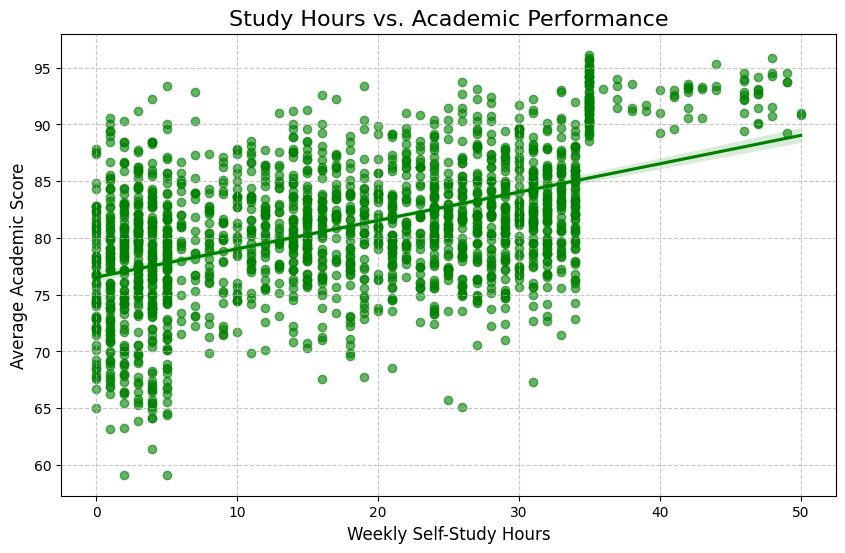

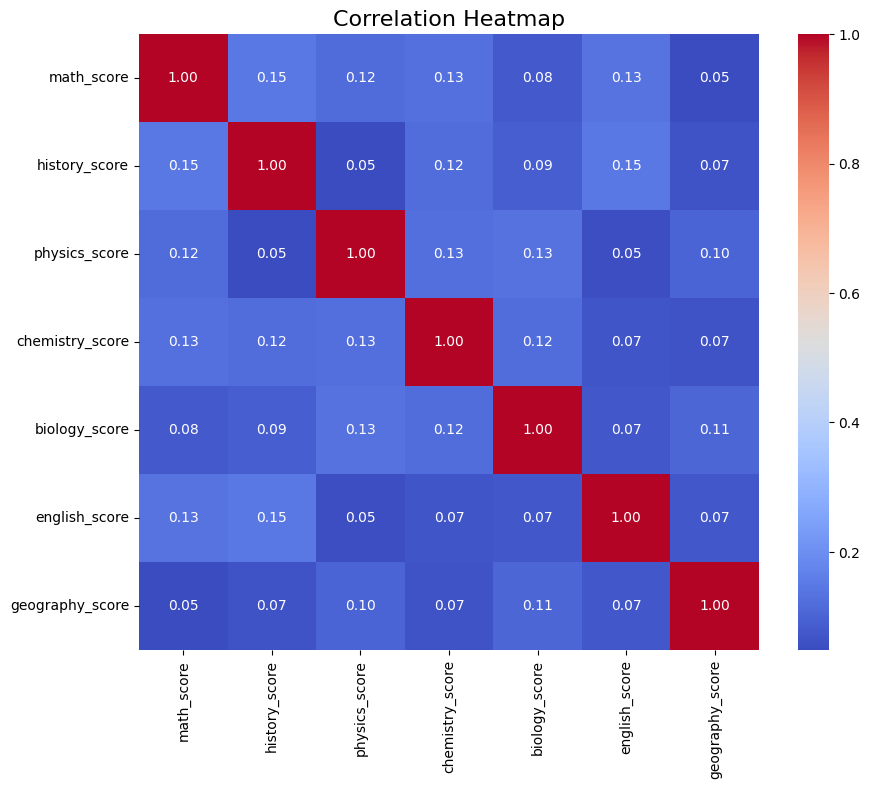

In [ ]:
# Relationship Between Study Hours and Performance
average_scores = df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score','geography_score']].mean(axis=1)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='weekly_self_study_hours', y=average_scores, color='green', scatter_kws={'alpha':0.6})
plt.title('Study Hours vs. Academic Performance', fontsize=16)
plt.xlabel('Weekly Self-Study Hours', fontsize=12)
plt.ylabel('Average Academic Score', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Heatmap for Correlations
plt.figure(figsize=(10, 8))
correlation_data = df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score','geography_score']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


At-Risk Students:
     first_name   last_name  absence_days  average_score
2          Tina     Andrews             9      86.428571
13       Pamela     Jackson            10      79.428571
22      Shannon     Simpson             9      73.714286
23         Sean     Griffin             9      68.142857
52         Luke     Shannon             9      68.428571
...         ...         ...           ...            ...
1912    Bethany      Thomas            10      69.714286
1958     Dennis  Richardson            10      84.571429
1965   Jennifer     Leblanc             6      59.142857
1977    Kristin      Garcia            10      76.142857
1998   Brittany     Compton            10      80.857143

[146 rows x 4 columns]

Dashboard Summary:
Total Students: 2000
At-Risk Students: 146
Students with Unknown Career Aspirations: 223


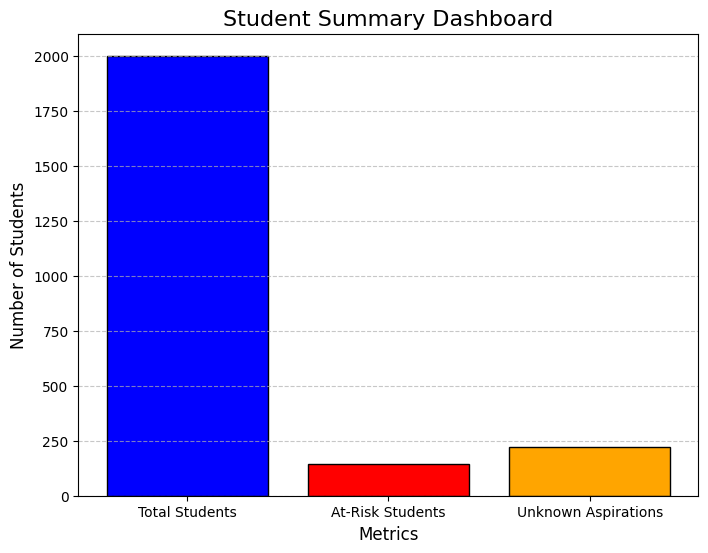

In [ ]:
import pandas as pd

# Assuming the dataset is already loaded in df and average score is calculated
df['average_score'] = df[['math_score', 'history_score', 'physics_score',
                          'chemistry_score', 'biology_score', 'english_score',
                          'geography_score']].mean(axis=1)

# Define thresholds
threshold_absence = 8
threshold_score = 60

# Flagging At-Risk Students
at_risk_students = df[(df['absence_days'] > threshold_absence) | (df['average_score'] < threshold_score)]

# Display At-Risk Students
print("At-Risk Students:")
print(at_risk_students[['first_name', 'last_name', 'absence_days', 'average_score']])

# Dashboard Summary
total_students = len(df)
at_risk_count = len(at_risk_students)
career_unknown_count = len(df[df['career_aspiration'] == 'Unknown'])

print("\nDashboard Summary:")
print(f"Total Students: {total_students}")
print(f"At-Risk Students: {at_risk_count}")
print(f"Students with Unknown Career Aspirations: {career_unknown_count}")

# Visualize At-Risk Students
import matplotlib.pyplot as plt

# Bar chart for summary counts
summary_counts = {'Total Students': total_students,
                  'At-Risk Students': at_risk_count,
                  'Unknown Aspirations': career_unknown_count}

plt.figure(figsize=(8, 6))
plt.bar(summary_counts.keys(), summary_counts.values(), color=['blue', 'red', 'orange'], edgecolor='black')
plt.title('Student Summary Dashboard', fontsize=16)
plt.ylabel('Number of Students', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


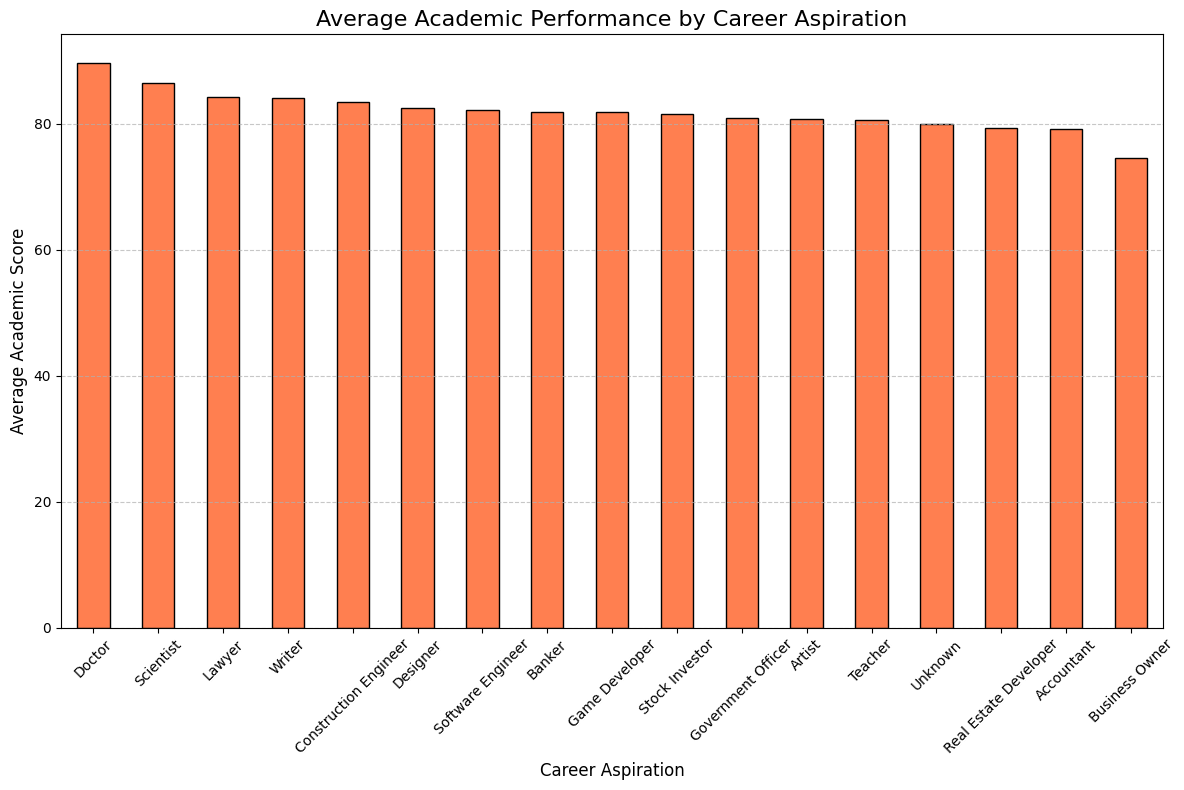

Students aspiring to be doctors but underperforming in relevant subjects:
Empty DataFrame
Columns: [first_name, last_name, math_score, physics_score]
Index: []


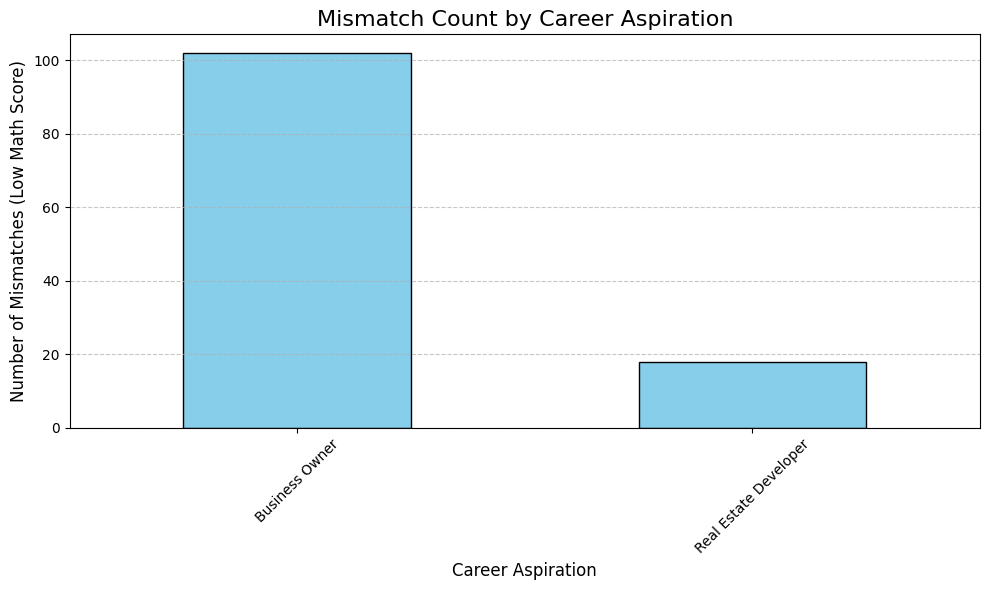

In [ ]:
import matplotlib.pyplot as plt

# Calculate average score across all subjects
df['average_score'] = df[['math_score', 'history_score', 'physics_score',
                          'chemistry_score', 'biology_score', 'english_score',
                          'geography_score']].mean(axis=1)

# Group by career aspiration and calculate the average academic performance
career_performance = df.groupby('career_aspiration')['average_score'].mean().sort_values(ascending=False)

# Plot average performance by career aspiration
plt.figure(figsize=(12, 8))
career_performance.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Academic Performance by Career Aspiration', fontsize=16)
plt.xlabel('Career Aspiration', fontsize=12)
plt.ylabel('Average Academic Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Highlight Mismatches: Students aspiring to be doctors but underperforming in relevant subjects
mismatched_students = df[(df['career_aspiration'] == 'Doctor') & (df['math_score'] < 60)]

# Print mismatched students
print("Students aspiring to be doctors but underperforming in relevant subjects:")
print(mismatched_students[['first_name', 'last_name', 'math_score', 'physics_score']])

# Optional: Count and visualize mismatches for all career aspirations
mismatch_counts = df[(df['math_score'] < 60)].groupby('career_aspiration').size()

plt.figure(figsize=(10, 6))
mismatch_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mismatch Count by Career Aspiration', fontsize=16)
plt.xlabel('Career Aspiration', fontsize=12)
plt.ylabel('Number of Mismatches (Low Math Score)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
